In [1]:
import pandas as pd


file_path = "uci-ml-phishing-dataset.xlsx" 
phishing_data = pd.read_excel(file_path, sheet_name='uci-ml-phishing-dataset')

print(phishing_data.head())


   id  having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0   1                 -1           1                   1                 1   
1   2                  1           1                   1                 1   
2   3                  1           0                   1                 1   
3   4                  1           0                   1                 1   
4   5                  1           0                  -1                 1   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0                        -1             -1                 -1              -1   
1                         1             -1                  0               1   
2                         1             -1                 -1              -1   
3                         1             -1                 -1              -1   
4                         1             -1                  1               1   

   Domain_registeration_length   ...    popU

In [2]:
#All Libraries used
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 4.1 What URL Features are most helpful in spotting phishing sites? 

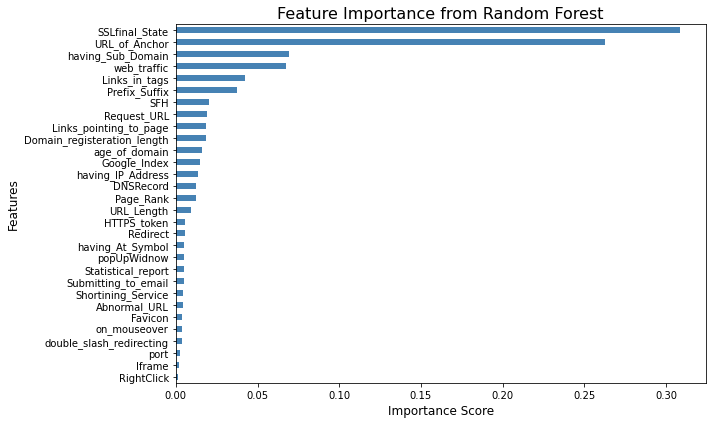

In [3]:
# Splitting the data into features and target
X = phishing_data.drop(['id', 'Result'], axis=1)
y = phishing_data['Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
important_features.sort_values(ascending=True).plot(kind='barh', color='steelblue')
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()



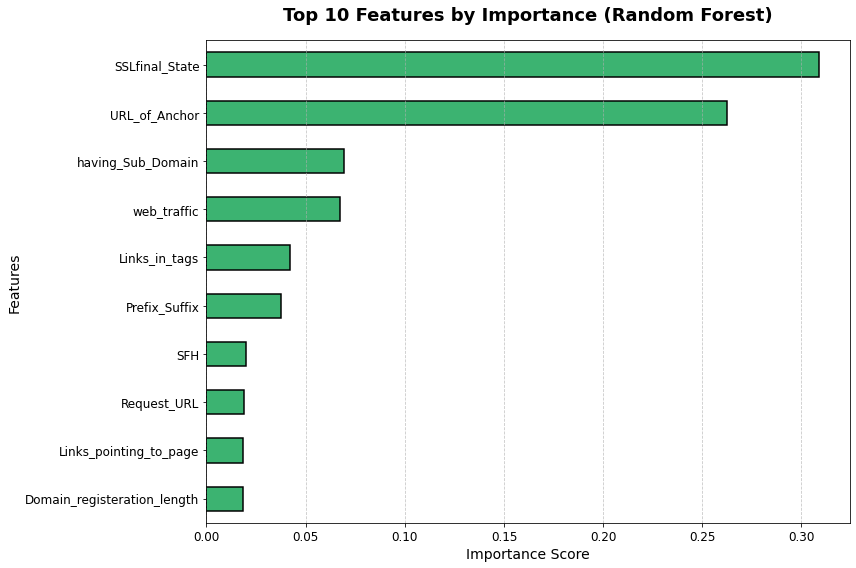

In [4]:
#Top 10 most important features
top_10_features = important_features.head(10)

plt.figure(figsize=(12, 8))
top_10_features.sort_values(ascending=True).plot(
    kind='barh', 
    color='mediumseagreen', 
    edgecolor='black', 
    linewidth=1.5
)
plt.title('Top 10 Features by Importance (Random Forest)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



# 4.2 Does using HTTPs make a phishing site look more trustworthy?

<Figure size 720x504 with 0 Axes>

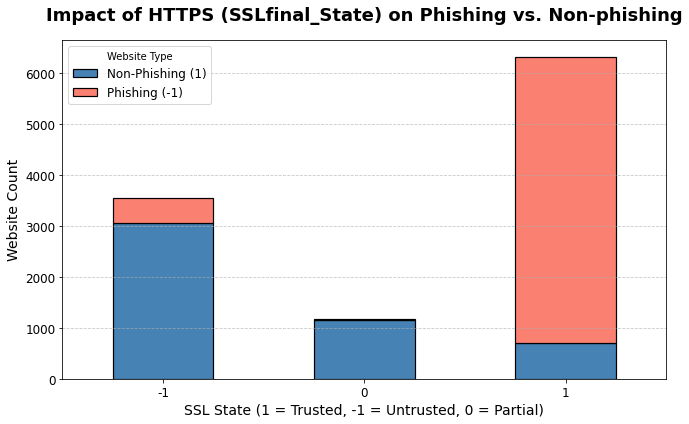

In [5]:
import matplotlib.pyplot as plt
#Visualization of the relationship between SSLfinal_State and phishing status
https_analysis = phishing_data.groupby(['SSLfinal_State', 'Result']).size().unstack()

plt.figure(figsize=(10, 7))
https_analysis.plot(
    kind='bar', 
    stacked=True, 
    color=['steelblue', 'salmon'], 
    edgecolor='black', 
    linewidth=1.2,
    figsize=(10, 6)
)
plt.title("Impact of HTTPS (SSLfinal_State) on Phishing vs. Non-phishing", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("SSL State (1 = Trusted, -1 = Untrusted, 0 = Partial)", fontsize=14)
plt.ylabel("Website Count", fontsize=14)
plt.legend(["Non-Phishing (1)", "Phishing (-1)"], title="Website Type", fontsize=12)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 4.3 Can a simple model detect phishing accurately, or do we need a more complex mode?

In [6]:
#Logistic Regression Model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Model
y_pred_rf = rf.predict(X_test)

# Compare Accuracies
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.9222188724751281
Random Forest Accuracy: 0.9668375037684654


# 4.4 Is URL information enough to classify phishing, or do we need more data from the webpage?

In [7]:
#Checking URL-based features only
url_features = ['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol',
                'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain']

X_url = phishing_data[url_features]
X_train_url, X_test_url, y_train, y_test = train_test_split(X_url, y, test_size=0.3, random_state=42)

# Train Random Forest model with only URL features
rf_url = RandomForestClassifier(random_state=42)
rf_url.fit(X_train_url, y_train)
y_pred_url = rf_url.predict(X_test_url)

print("Accuracy with URL features only:", accuracy_score(y_test, y_pred_url))


Accuracy with URL features only: 0.7202291227012361
